In [9]:
import sys
sys.path.append('..') # parent directory

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from LinearRegression import MyLinearRegression
from sklearn.linear_model import LinearRegression
from metrics import rmse, r2_score

In [10]:
# scatter plot points 
def scatter_plot(x, y):
    plt.scatter(x, y, s=10)
    plt.xlabel('x')
    plt.ylabel('y')

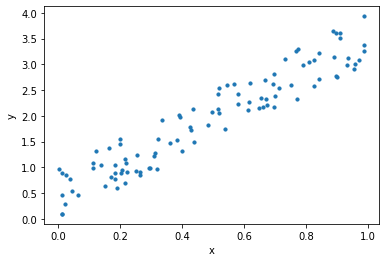

In [11]:
# generate a random dataset of points, they should lie close to a line
x = np.random.rand(100, 1)
# visual changes when changing the coefficient of x
y = 3 * x + np.random.rand(100, 1) 
scatter_plot(x, y)

In [12]:
# first, test MyLinearRegression

# initialise the model
my_regression_model = MyLinearRegression()
# add x0 = 1 to each of the feature vectors
m = x.shape[0]
x_train = np.c_[np.ones((m,1)), x]
# fit the data
my_regression_model.fit(x_train, y)
# predict
my_y_predict = my_regression_model.predict(x_train)

In [13]:
# now compare with the scikit-learn LinearRegression 

# initialise the model
regression_model = LinearRegression()
# fit the data
regression_model.fit(x, y)
# predict y coordinates from x coordinates
y_predict = regression_model.predict(x)

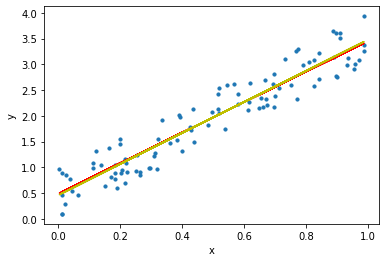

In [14]:
# data points
scatter_plot(x, y)
# predicted values
plt.plot(x, my_y_predict, color='r')
plt.plot(x, y_predict, color='y')

In [15]:
# evaluate MyLinearRegression
coefficient = my_regression_model.model_params[1]
intercept = my_regression_model.model_params[0]
rmse_ = rmse(my_y_predict, y, m)
r2_ = r2_score(my_y_predict, y)

print("MyLinearRegression")
print(f"Coefficient: {coefficient}")
print(f"Intercept: {intercept}")
print(f"RMSE: {rmse_}")
print(f"R2-score: {r2_}")

MyLinearRegression
Coefficient: [2.95902629]
Intercept: [0.49118491]
RMSE: 0.3031840488132824
R2-score: 0.899441109847622


In [16]:
# compare with evaluation for sklearn LinearRegression
coefficient = regression_model.coef_
intercept = regression_model.intercept_
rmse_ = rmse(y_predict, y, m)
r2_ = r2_score(y_predict, y)

print("sklearn LinearRegression")
print(f"Coefficient: {coefficient}")
print(f"Intercept: {intercept}")
print(f"RMSE: {rmse_}")
print(f"R2-score: {r2_}")

sklearn LinearRegression
Coefficient: [[3.01800144]]
Intercept: [0.46042882]
RMSE: 0.30265752092467757
R2-score: 0.8997900799519163
